# step 58. VGG16
이미지<img src = "">

In [ ]:
import dezero.functions as F
import dezero.layers as L
from dezero import utils

class VGG16(Model):
    WEIGHTS_PATH = 'https://github.com/koki0702/dezero-models/releases/download/v0.1/vgg16.npz'
    def __init__(self, pretrained = False):
        super().__init__()
        # 입력 채널 수를 미리 지정하지 않음 (순전파 시에 흐르는 데이터로부터 얻고 그 시점에 가중치 초기화)
        self.conv1_1 = L.Conv2d(64, kernel_size = 3, stride = 1, pad = 1)
        self.conv1_2 = L.Conv2d(64, kernel_size = 3, stride = 1, pad = 1)
        self.conv2_1 = L.Conv2d(128, kernel_size = 3, stride = 1, pad = 1)
        self.conv2_2 = L.Conv2d(128, kernel_size = 3, stride = 1, pad = 1)
        self.conv3_1 = L.Conv2d(256, kernel_size = 3, stride = 1, pad = 1)
        self.conv3_2 = L.Conv2d(256, kernel_size = 3, stride = 1, pad = 1)
        self.conv3_4 = L.Conv2d(256, kernel_size = 3, stride = 1, pad = 1)
        self.conv4_1 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        self.conv4_2 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        self.conv4_3 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        self.conv5_1 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        self.conv5_2 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        self.conv5_3 = L.Conv2d(512, kernel_size = 3, stride = 1, pad = 1)
        # 위와 마찬가지로 출력 크기만 지정 (입력 크기는 실제로 흘러들어온 데이터를 보고 자동 결정)
        self.fc6 = L.Linear(4096)
        self.fc7 = L.Linear(4096)
        self.fc8 = L.Linear(1000)
        
        if pretrained:
            weights_path = utils.get_file(VGG16.WEIGHTS_PATH)
            self.load_weights(weights_path) # 부모인 Model 클래스로부터 상속받은 메서드
        
    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = F.pooling(x, 2, 2)
        x = F.reshape(x, (x.shape[0], -1))  # flatten
        x = F.dropout(F.relu(self.fc6(x)))
        x = F.dropout(F.relu(self.fc7(x)))
        x = self.fc8(x)
        return x
    
    @staticmethod
    def preprocess(image, size=(224, 224), dtype=np.float32):
        image = image.convert('RGB')                                
        if size:
            image = image.resize(size)                              # resizing
        image = np.asarray(image, dtype=dtype)                      # image2np
        image = image[:, :, ::-1]                                   # RGB를 BGR순서로   
        image -= np.array([103.939, 116.779, 123.68], dtype=dtype)  # 각 채널별 (사전훈련)평균빼기
        image = image.transpose((2, 0, 1))
        return image

Downloading: vgg16.npz
 Done


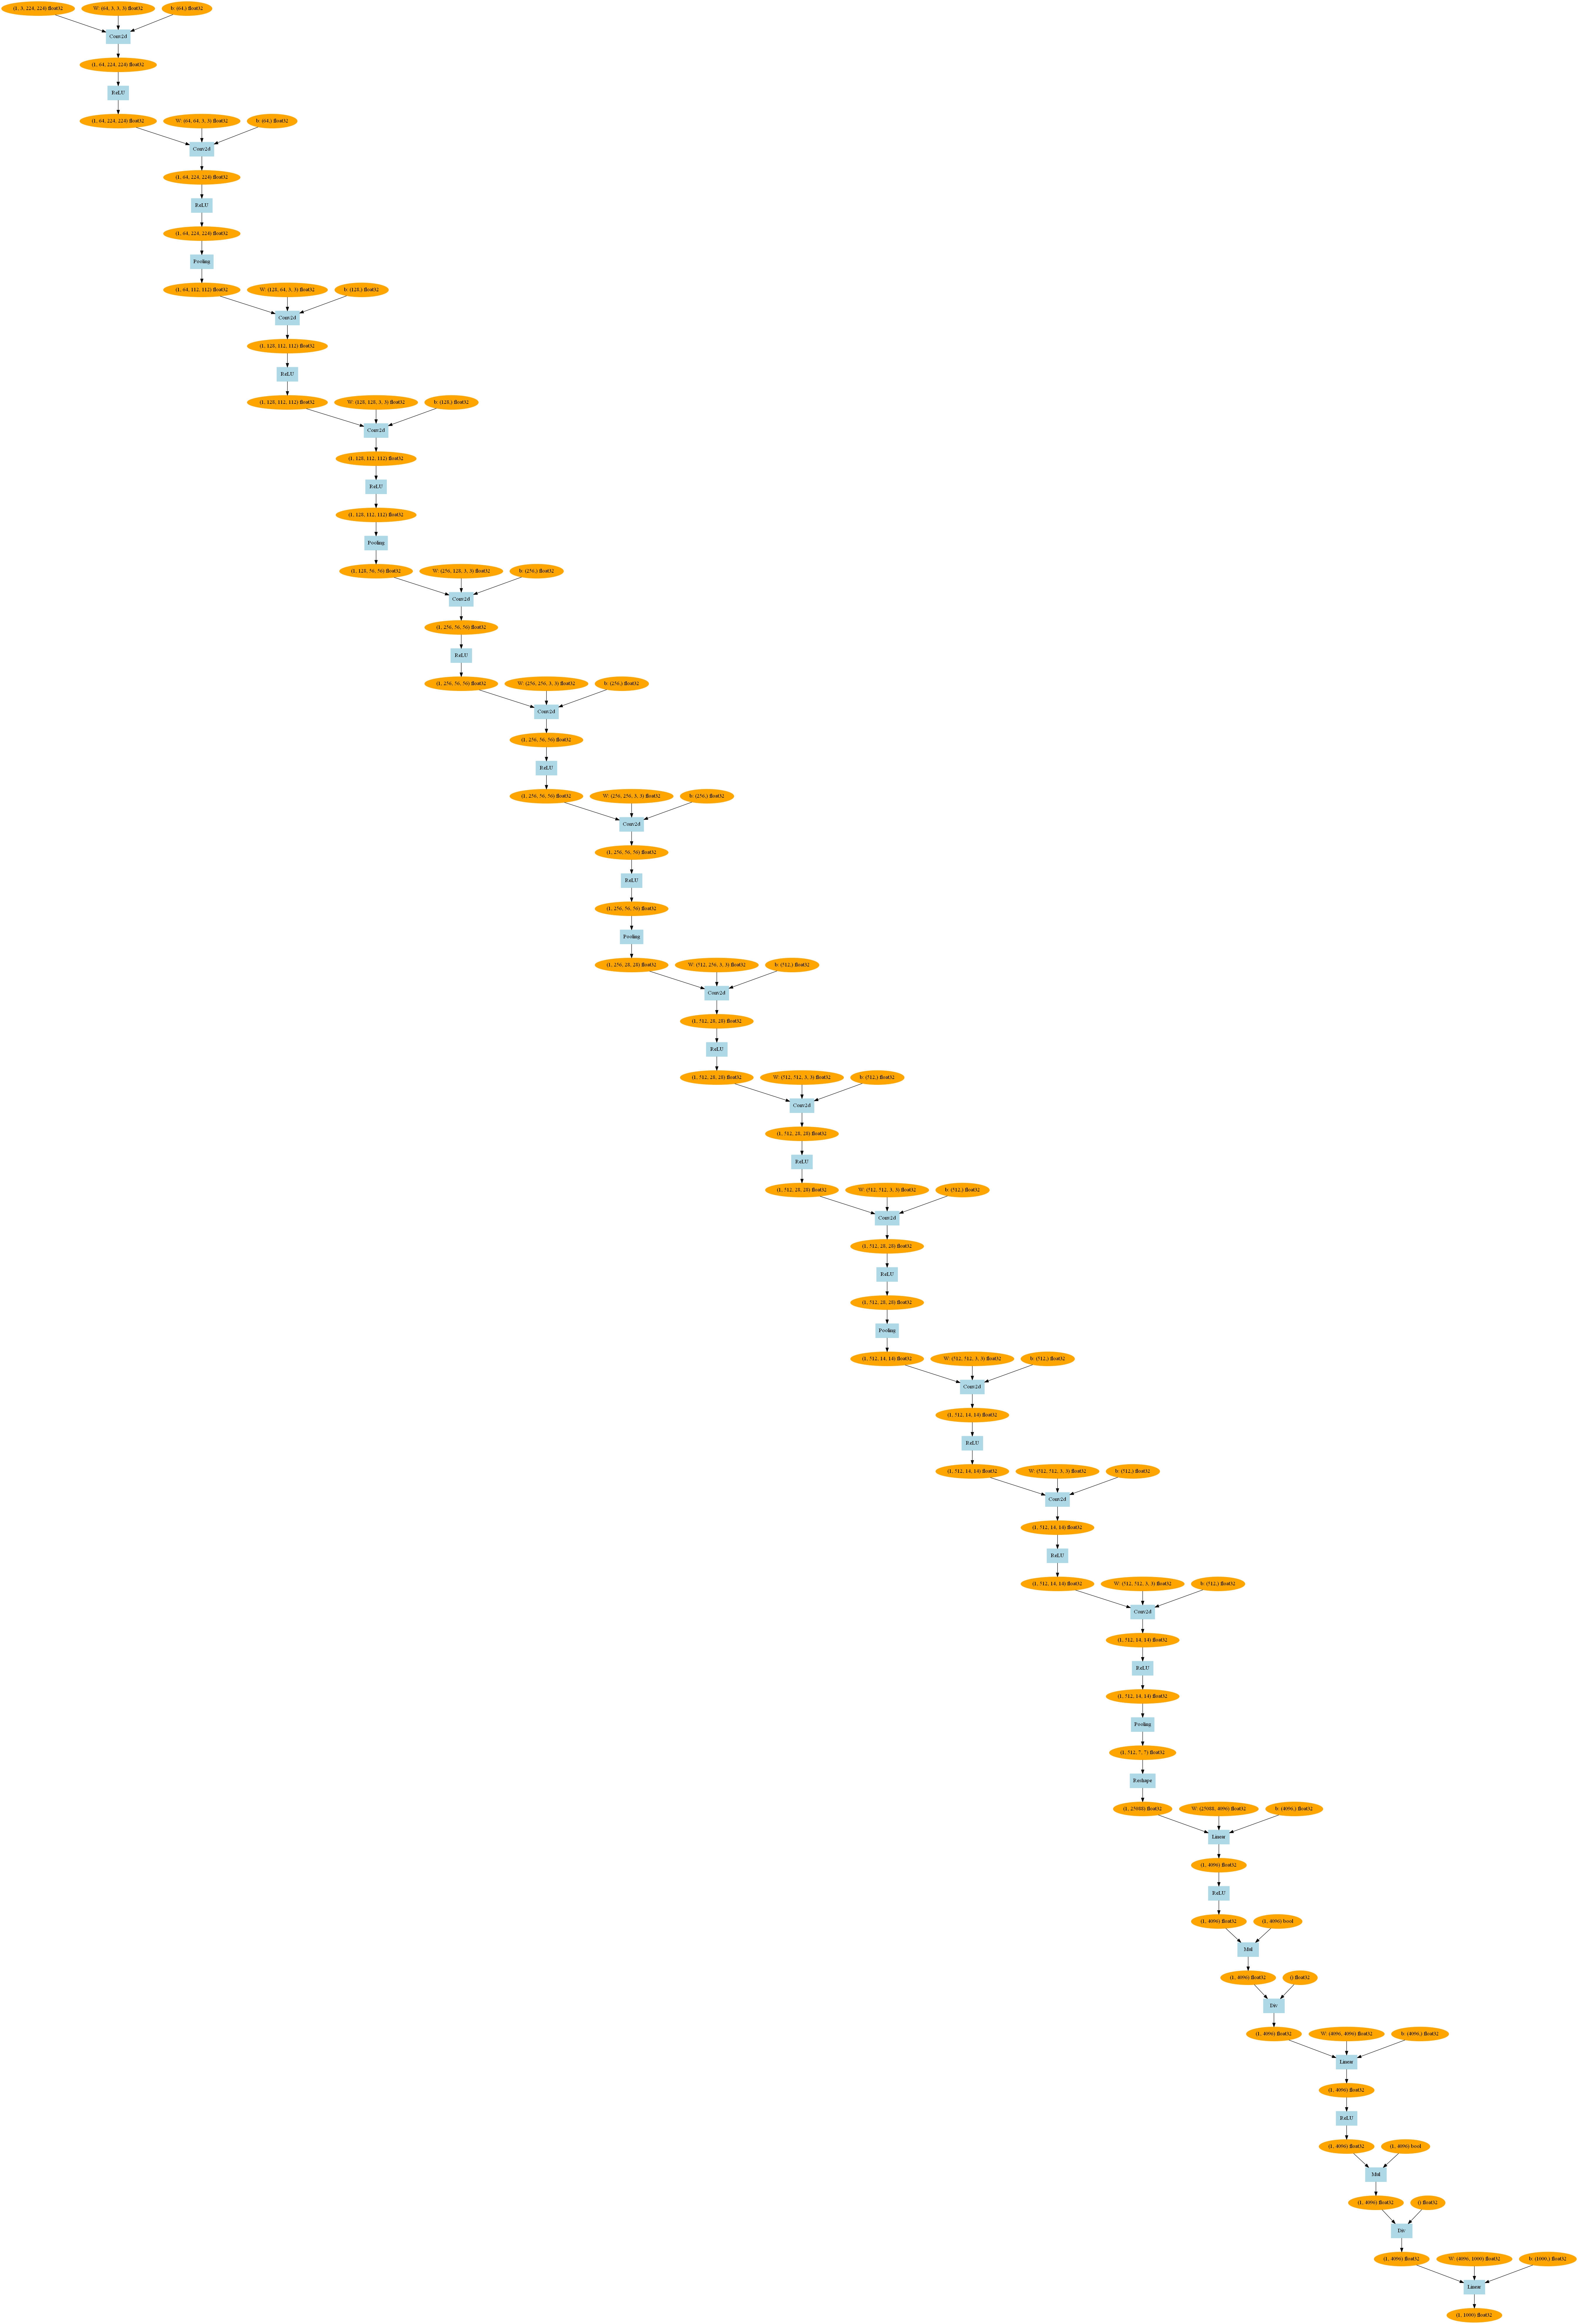

In [1]:
import numpy as np
from dezero.models import VGG16

model = VGG16(pretrained = True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)
model.plot(x)

In [2]:
import dezero 
from PIL import Image

url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'

img_path = dezero.utils.get_file(url)
img = Image.open(img_path)

# 사전학습 가중치를 사용하여 미지의 데이터에 대해 inference 진행 시
# 새로운 input 데이터에 대해 모델을 학습시켰을 때와 똑같은 전처리를 해줘야 한다. 
x = VGG16.preprocess(img)
x = x[np.newaxis] # 배치 차원 추가 (3, 224, 224) -> (1, 3, 224, 224)

model = VGG16(pretrained=True)
with dezero.test_mode(): # 추론모드
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')
labels = dezero.datasets.ImageNet.labels()
print(labels[predict_id])

Downloading: imagenet1000_clsidx_to_labels.txt
 Done
zebra
